In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn import tree

In [ ]:
# I believe there to be overfitting in the previous model as performance was good on training data but looking
# At all of the trees/nodes there seems to be poor generalization across the model. 
# This can be attributed to the large number of alternatives we are dealing with - could lead to overfitting

In [10]:
features = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 
            'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 
            'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip']

file_path = '/Users/mattrusso/Desktop/trip_data 3.csv'

df = pd.read_csv(file_path, usecols=features)

X = df.iloc[:,0:14].to_numpy() #input features
y = df.iloc[:,14].tolist() #labels

In [11]:
df

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge,tip
0,2.0,1.0,24,41,1.0,0.67,5.5,0.5,0.5,0.0,0.3,8.84,1.0,0.00,good
1,2.0,1.0,112,232,1.0,2.64,10.0,0.5,0.5,0.0,0.3,16.86,1.0,2.75,low
2,2.0,1.0,97,227,5.0,3.85,18.0,0.5,0.5,0.0,0.3,22.20,1.0,0.00,low
3,2.0,1.0,223,129,1.0,2.97,11.5,0.5,0.5,0.0,0.3,13.80,1.0,0.00,low
4,2.0,1.0,223,7,1.0,1.60,8.0,0.5,0.5,0.0,0.3,11.62,1.0,0.00,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171936,2.0,1.0,116,42,1.0,0.61,5.0,0.5,0.5,0.0,0.3,6.30,1.0,0.00,no-tip
171937,2.0,1.0,74,75,1.0,0.93,4.5,0.5,0.5,0.0,0.3,10.80,1.0,0.00,good
171938,2.0,1.0,255,95,1.0,6.45,22.0,0.5,0.5,0.0,0.3,28.75,1.0,0.00,low
171939,2.0,1.0,61,80,1.0,3.77,15.5,0.5,0.5,0.0,0.3,21.84,1.0,0.00,good


In [34]:
seed = 5  
#Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = .30, 
                                                    random_state = 42, 
                                                    stratify = y
                                                   )

In [52]:
#Instantiate the Decision Tree Classifier object 
dt_estimator = DecisionTreeClassifier()

In [75]:
params = {
    'criterion': ['gini', 'entropy'], #a list of options for criterion.
    'max_depth': [5,10,15], #TODO: provide a list of three numbers between 5 and 15 inclusive.
    'min_samples_split':[100,145,190,235,285,325,375,425,460,500] #TODO: provide a list of ten numbers between 100 and 500.
}

In [67]:
params

{'criterion': ['gini', 'entropy'],
 'max_depth': [5, 10, 15],
 'min_samples_split': [100, 120, 165, 215, 285, 320, 370, 426, 477, 500]}

In [76]:
rand_search = RandomizedSearchCV(estimator=dt_estimator, 
                                 param_distributions=params, 
                                 random_state=7, 
                                 scoring='accuracy', 
                                 verbose=3, #display messages while training
                                 n_iter= 100 ,
                                 cv=10) 


estimator = rand_search.fit(X_train, y_train)


print('Best parameters:', estimator.best_params_)
print('Best score:', estimator.best_score_) #note: if the score is low, increase n_iter or adjust the values in step 5.

/Users/mattrusso/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] min_samples_split=100, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=100, max_depth=5, criterion=gini, score=0.663, total=   0.2s
[CV] min_samples_split=100, max_depth=5, criterion=gini ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  min_samples_split=100, max_depth=5, criterion=gini, score=0.661, total=   0.2s
[CV] min_samples_split=100, max_depth=5, criterion=gini ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  min_samples_split=100, max_depth=5, criterion=gini, score=0.658, total=   0.3s
[CV] min_samples_split=100, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=100, max_depth=5, criterion=gini, score=0.667, total=   0.2s
[CV] min_samples_split=100, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=100, max_depth=5, criterion=gini, score=0.669, total=   0.2s
[CV] min_samples_split=100, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=100, max_depth=5, criterion=gini, score=0.663, total=   0.2s
[CV] min_samples_split=100, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=100, max_depth=5, criterion=gini, score=0.661, total=   0.2s
[CV] min_samples_split=100, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=100, max_depth=5, criterion=gini, score=0.664, total=   0.3s
[CV] min_samples_split=100, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=100, max_depth=5, criterion=gini, score=

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  3.2min finished


Best parameters: {'min_samples_split': 100, 'max_depth': 15, 'criterion': 'entropy'}
Best score: 0.9203210200446991


In [56]:
#Instantiate the Decision Tree Classifer object 
dt_classifier = DecisionTreeClassifier(criterion= 'entropy', #TODO: use the value from the random search results.
                                       max_depth= 15,#TODO: use the value from the random search results.
                                       min_samples_split= 100 #TODO: use the value from the random search results.
                                      )

#Train Decision Tree Classifer using the `fit` method
dt_classifier.fit(X_train, y_train)

#Make predictions with `X_test` and store the result in a variable called `y_pred
y_pred = dt_classifier.predict(X_test)

In [71]:
dtc=dt_classifier.fit(X_train, y_train)

In [57]:
y_pred = dt_classifier.predict(X_test)

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9209429463195239


In [69]:
import matplotlib.pyplot as plt

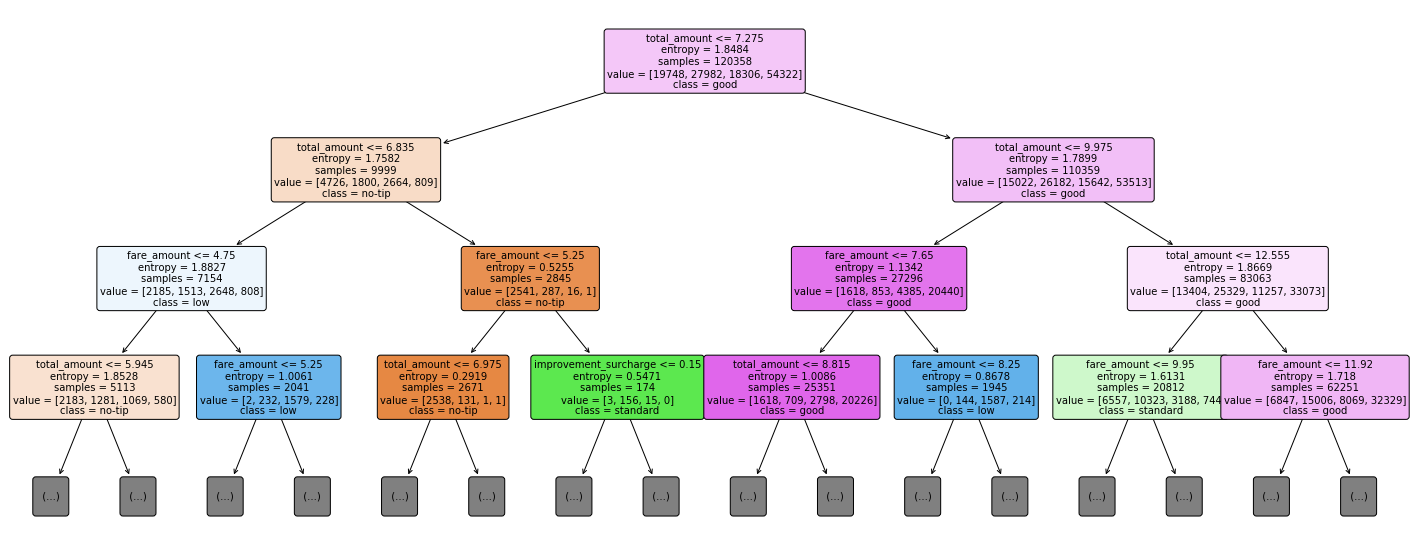

In [78]:
fig, ax = plt.subplots(figsize=(25, 10))  
tree.plot_tree(dtc, feature_names = features [:-1], class_names = list(set(y)), precision = 4, proportion = False, rounded = True,
               max_depth= 3, fontsize= 10, filled = True);

In [ ]:
# The 92.09 % accuracy tells us that this is a strong model - performance was high.
# Although accuracy fell from the last model, we are using random search
# The decision tree grew with entropy rather than Gini in this model
# I altered the values to the params to see the impact it would have on the decision tree and accuracy
# It seemed I was generating accuracy anywhere from 88-92% accuracy. I felt the values of the params 
# I have coded was a sweet spot for the model 